In [1]:
import plotly.express as px
import pycountry_convert as pc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
terror=pd.read_csv('gtd.csv', encoding='ISO-8859-1', low_memory=False)
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','success' : 'Success',
       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded',
       'summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive',
         'suicide': 'suicide', 'natlty1': 'nationality'},
       inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city', 'Success','latitude','longitude','AttackType','Killed',
       'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive', 'suicide', 'nationality']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city  Success   latitude   longitude                   AttackType  \
0  Santo Domingo        1  18.456792  -69.951164                Assassination   
1    Mexico city        1  19.371887  -99.086624  Hostage Taking (Kidnapping)   
2        Unknown        1  15.478598  120.599741                Assassination   

   ...  Wounded                   Target Summary  \
0  ...      0.0             Julio Guzman     NaN   
1  ...      0.0  Nadine Chaval, daughter     NaN   
2  ...      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive suicide  nationality  casualities  
0     Unknown    NaN       0         58.0          1.0  
1     Unknown    NaN       0         21.0          0.0  
2     Unknown    NaN       0        217.0          1.0  

[3 rows x 21 columns]

In [2]:
terror.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   Success      181691 non-null  int64  
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
 18  suicide      181691 non-

In [3]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum casualities in an attack are:',terror['casualities'].max(),'that took place in',
      terror.loc[terror['casualities'].idxmax()].Country, ' - Target : ',terror.loc[terror['casualities'].idxmax()].Target )



Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum casualities in an attack are: 9574.0 that took place in United States  - Target :  Passengers and crew members on American Airlines Flight 11 and the people working in the North Tower of the World Trade Center in New York City


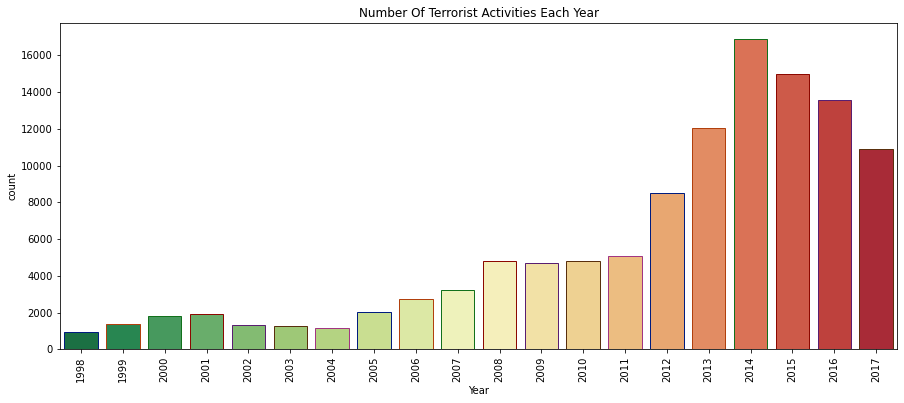

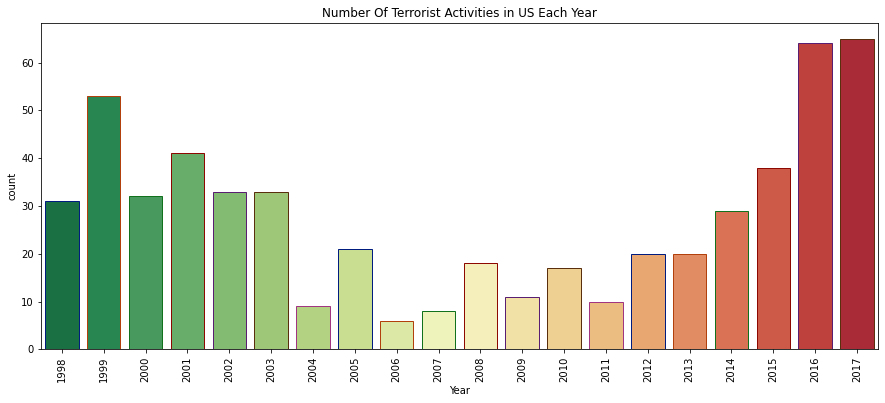

In [4]:
#plt.style.use('fivethirtyeight')
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=terror.loc[terror['Year'] > 1997],palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()
USterror = terror.loc[(terror['Country'] == 'United States') & (terror['Year'] > 1997)]
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=USterror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities in US Each Year')
plt.show()

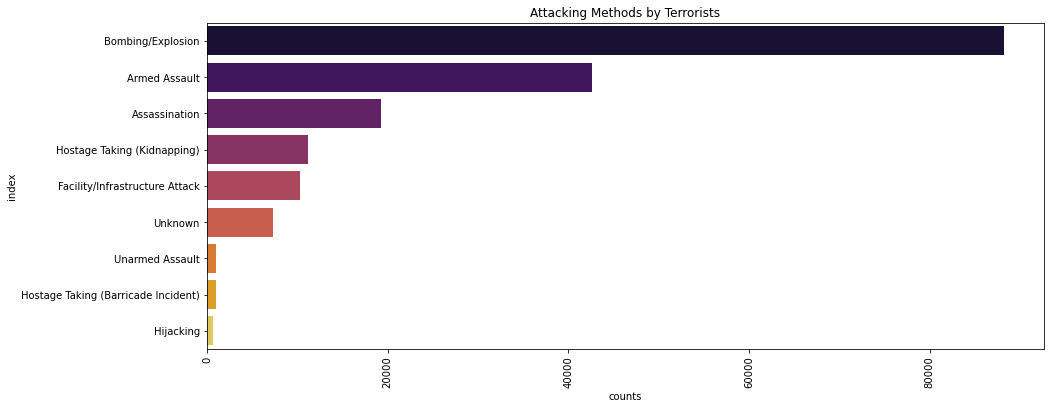

In [5]:
plt.subplots(figsize=(15,6))
sns.barplot(x="counts", y="index",data= terror['AttackType'].value_counts().reset_index(name='counts'),palette='inferno')
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

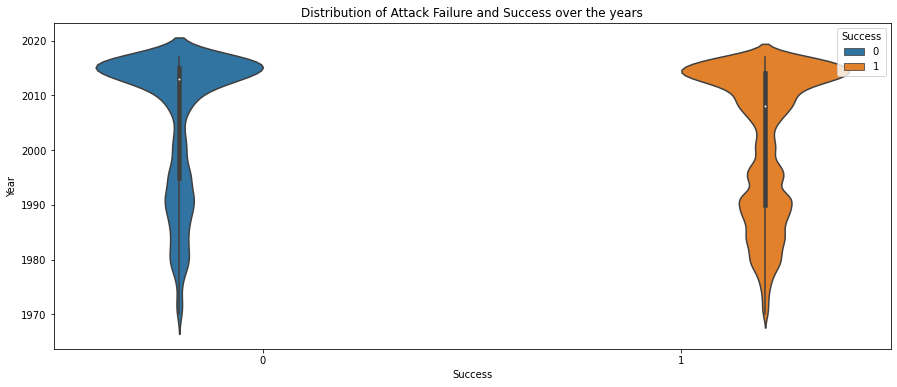

In [6]:
import warnings
warnings.filterwarnings("ignore")
plt.subplots(figsize=(15,6))
sns.violinplot(x = terror['Success'], y = terror['Year'], data = terror, hue =terror['Success'])
plt.title('Distribution of Attack Failure and Success over the years')
plt.show()

In [7]:
regiondf = terror['Region'].value_counts().reset_index(name='counts')
fig = px.scatter(regiondf, x="index", y="counts",
	         size="counts", color="counts",
                 hover_name="index")
fig.update_layout(
    title_text = 'Number of terrorist attacks by Region',
   
)
fig.show()

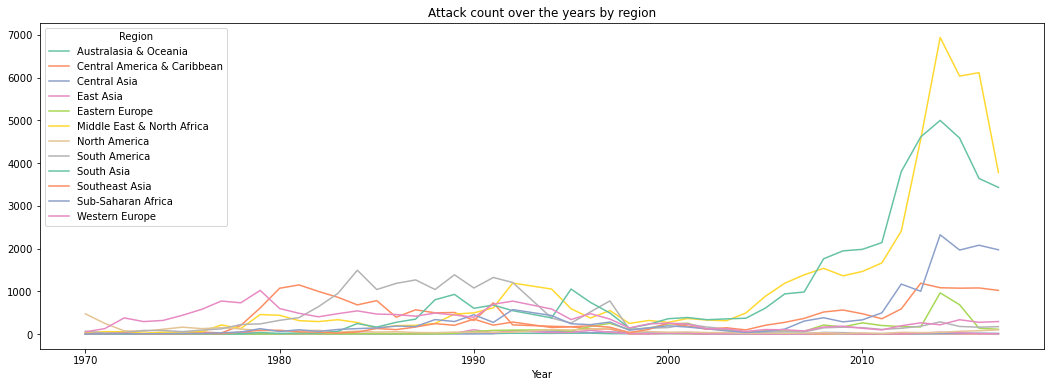

In [105]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attack count over the years by region')
plt.show()

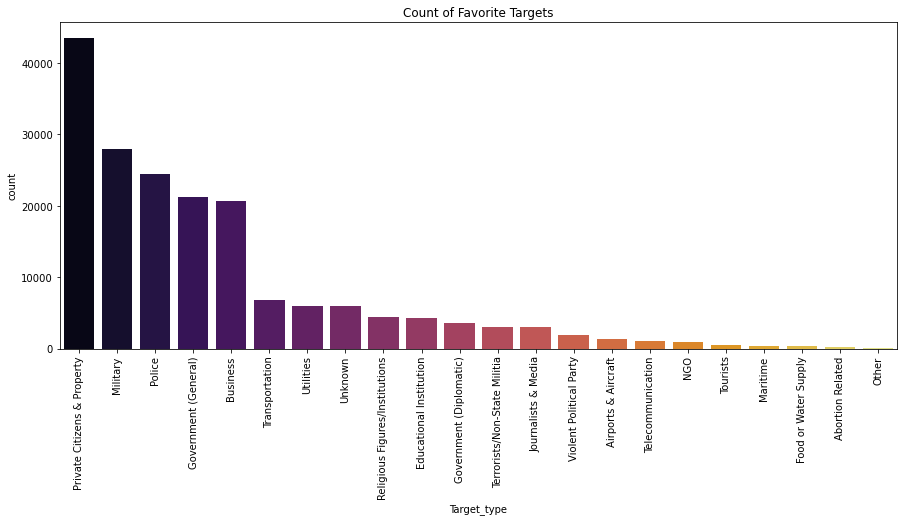

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Favorite Targets')
plt.show()

Text(0.5, 1.0, 'Groups with highest number of kills')

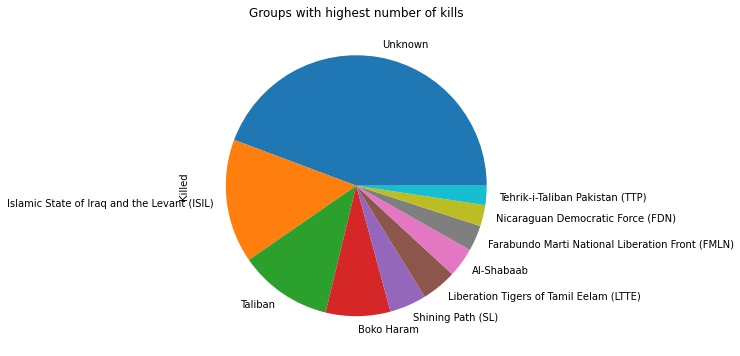

In [9]:
plt.subplots(figsize=(15,6))
df2 = terror.groupby(['Group']).sum()['Killed'].sort_values(ascending = False).head(10)
#d = dict(df2)
df2.plot(kind = 'pie')
plt.title("Groups with highest number of kills")

In [112]:

fdf = terror.groupby(['Country']).size().reset_index(name = 'counts')
def convert(name):
    try:
        name = pc.country_name_to_country_alpha3(name, cn_name_format="default")
        return name
    except Exception as e :
        #print(e)
        return 'Unknown'
    
fdf['Country'] = fdf['Country'].apply(lambda x: convert(x))

fig = px.choropleth(fdf, locations="Country",
                    color="counts", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
fig.update_layout(
    title_text = 'Intensity of terrorist attacks from 1970 to 2015',
   
)
fig.show()

In [118]:
yeardf = terror.groupby(['Year'])['Killed'].sum().reset_index(name='counts')

fig = px.treemap(yeardf, path=['Year'], values='counts',
                 color='counts', hover_data=['counts'],)
fig.update_layout(
    title_text = 'People killed over the years',
   
)
fig.show()

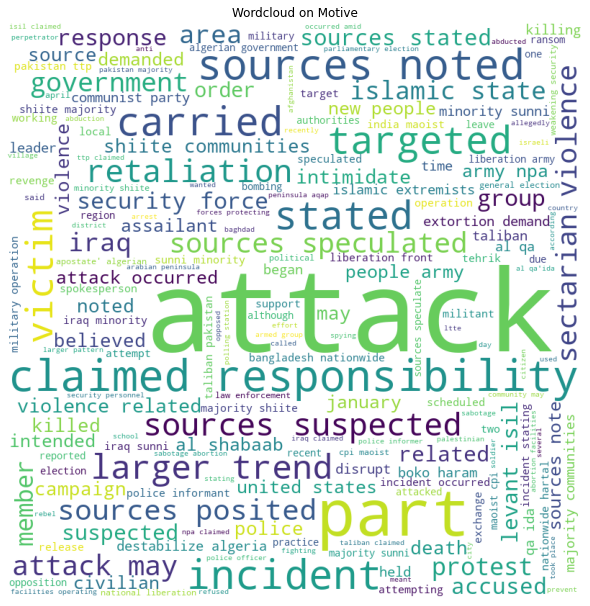

In [121]:
stopwords = set(STOPWORDS) 
stopwords.add('unknown')
stopwords.add('motive')
stopwords.add('specific')
stopwords.add('.')
stopwords.add(',')
stopwords.add(';')
terror.Motive.fillna("", inplace = True) 
comment_words = ''
# iterate through the csv file 
for val in terror.Motive: 
    if val == '':
        continue
    val = str(val) 
    val = val.lower()
    comment_words = comment_words + ' ' + val
    
 


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Wordcloud on Motive')
plt.show()

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [109]:
d = pd.read_csv('gtd.csv', encoding='ISO-8859-1')
d = d.rename(
columns={'iyear':'year', 'country':'country', 'natlty1':'nationality', 'success':'success','targtype1':'target', 'region' : 'region',
         'weaptype1':'weapon', 'attacktype1':'attack',
         'suicide':'suicide', 'imonth' : 'month'})

dff=d[d['year']>1998]

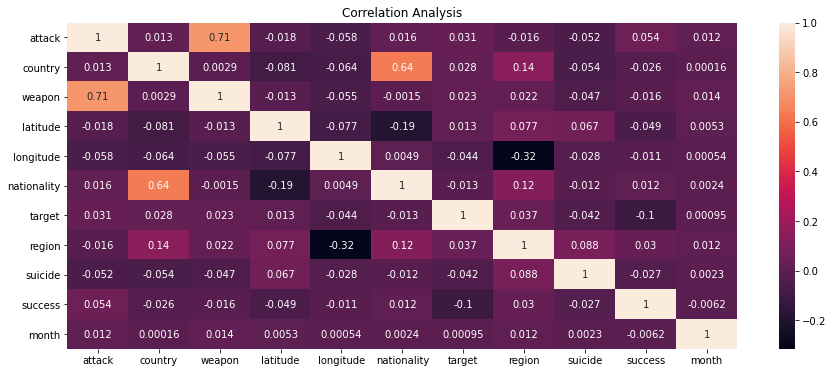

In [50]:
corr = dff[['attack', 'country', 'weapon', 'latitude','longitude','nationality','target','region',
            'suicide','success', 'month']].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True)

plt.title('Correlation Analysis')
plt.show()

In [51]:
#count of success and failures in dataset
dff['success'].astype('str')
dff.groupby('success').describe()

eventid                                                          \
           count          mean           std           min           25%   
success                                                                    
0        14327.0  2.013358e+11  4.034638e+08  1.999010e+11  2.012110e+11   
1        98923.0  2.011976e+11  4.391617e+08  1.999010e+11  2.010013e+11   

                                                      year               ...  \
                  50%           75%           max    count         mean  ...   
success                                                                  ...   
0        2.014123e+11  2.016062e+11  2.017123e+11  14327.0  2013.291268  ...   
1        2.013103e+11  2.015073e+11  2.017123e+11  98923.0  2011.909708  ...   

        INT_MISC       INT_ANY                                               
             75%  max    count      mean       std  min  25%  50%  75%  max  
success                                                                      
0            0.0  1.0  14327.0 -4.993369  4.689764 -9.0 -9.0 -9.0  0.0  1.0  
1            0.0  1.0  98923.0 -4.493010  4.693133 -9.0 -9.0 -9.0  0.0  1.0  

[2 rows x 608 columns]

In [52]:
dff['success'].astype('float')
newdf = dff[dff['success']==1].sample(n=22000)
df = pd.concat([newdf, dff[dff['success'] == 0]])
#DF is Final data set after filteration
success=pd.DataFrame(df['success'])
features = pd.DataFrame(df[['attack', 'country', 'weapon', 'latitude',
          'longitude','nationality','target','region','suicide', 'month']])
features.fillna(features.mean(), inplace=True)
features['latitude'].astype(float)
features['longitude'].astype(float)
features['nationality'].astype(float)
features['month'].astype(float)
print(features)


        attack  country  weapon   latitude   longitude  nationality  target  \
129201       3       95       6  33.303566   44.371773         95.0       2   
84874        2      229       5  -0.791773   29.045993        229.0       4   
161106       4      113       5  32.867867   13.189067        113.0       2   
153302       6      200      13  36.201721   37.143520         12.0      14   
146561       3      228       6  12.825647   44.846416        228.0      14   
...        ...      ...     ...        ...         ...          ...     ...   
181650       3      153       6  30.200819   66.994354        153.0      20   
181674       9       95      13  36.045059   41.716717         95.0       4   
181679       2       95       5  33.953167   44.921906         95.0       4   
181689       3       92       6  24.798346   93.940430         92.0       2   
181690       3      160       6   7.209594  124.241966        160.0      20   

        region  suicide  month  
129201      10    

In [67]:
features_train, features_test,target_train, target_test = train_test_split(features,success, 
                                                             test_size = 0.2,random_state=0)
#feature_train - 80% of feature data, feature_test - 20% feature data
#target_train - 80% of result(successful or not) data, target_test - 20% 
target_test['success'].astype('str')
print(target_test.groupby('success').size())
target_test['success'].astype('float')

success
0    2886
1    4380
dtype: int64


181357    1.0
103832    0.0
91536     1.0
106428    1.0
120538    1.0
         ... 
97581     0.0
82170     0.0
70610     1.0
174421    0.0
111402    0.0
Name: success, Length: 7266, dtype: float64

In [80]:
ds = features_test.join(target_test)
#totalset.groupby('success').size()
sds = ds[ds['success']==1].sample(n=2886)
fds = pd.concat([sds, ds[ds['success'] == 0]])

target_test = fds['success']
print(target_test)
features_test = fds.drop(['success'], axis=1)
features_test

84662     1
101408    1
128262    1
97318     1
116294    1
         ..
158701    0
97581     0
82170     0
174421    0
111402    0
Name: success, Length: 5772, dtype: int64


attack  country  weapon   latitude   longitude  nationality  target  \
84662        2       92       6  21.458685   82.015578    92.000000       3   
101408       2      153       5  24.891115   67.143311   153.000000      22   
128262       6       92      13  24.690899   94.165561    92.000000       1   
97318        9        4      13  32.164997   63.425297     4.000000       2   
116294       6      110       9  34.437213   35.830479   110.000000      14   
...        ...      ...     ...        ...         ...          ...     ...   
158701       3      160       6   7.018486  124.473881   160.000000      20   
97581        1        4       6  32.623739   65.456432     4.000000       2   
82170        3      153       6  34.006004   71.537430   153.000000       2   
174421       3        4       6  34.516895   69.147011   126.786413      20   
111402       3      603       6  54.607712   -5.956210   233.000000      20   

        region  suicide  month  
84662        6        0     11  
101408       6        0      5  
128262       6        0      3  
97318        6        0      7  
116294      10        0      4  
...        ...      ...    ...  
158701       5        0      2  
97581        6        0      8  
82170        6        0      1  
174421       6        0      5  
111402       8        0     10  

[5772 rows x 10 columns]

In [81]:
train = xgb.DMatrix(features_train, label = target_train)
test = xgb.DMatrix(features_test, label = target_test)

In [82]:
param = { 'max_depth': 6 , 'subsample': 0.5, 'num_class' : 2}

epoch = 10
model = xgb.train(param, train, epoch)


In [83]:
xgpred = model.predict(test)
#print(xgpred)
print("XGBoost accuracy score: " )
print(accuracy_score(target_test, xgpred))

XGBoost accuracy score: 
0.7307692307692307


[[1579 1307]
 [ 247 2639]]


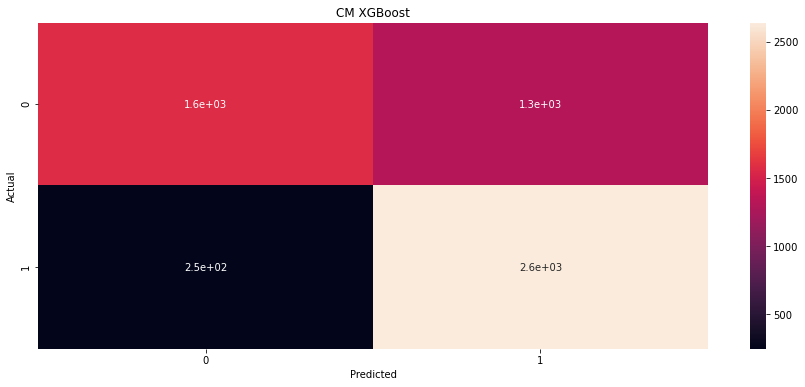

In [84]:
xgconfm = confusion_matrix(target_test, xgpred)
print(xgconfm)
plt.figure(figsize=(15,6))
sns.heatmap(xgconfm, annot = )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CM XGBoost')
plt.show()

In [127]:
xgprecision = xgconfm[1][1]/(xgconfm[1][1]+xgconfm[0][1])
xgprecision

0.6687785098834262

AUC = 0.7308


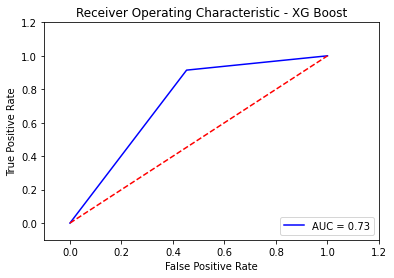

In [85]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, xgpred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC = %0.4f'% roc_auc)
plt.title('Receiver Operating Characteristic - XG Boost')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, xgpred, average='macro')

(0.7667550818858533, 0.7307692307692308, 0.7213723593754349, None)

In [87]:
forest= RandomForestClassifier(n_estimators=10)
forest = forest.fit( features_train, target_train.values.ravel()  )
print("Random Forest accuracy score: " )
print(forest.score(features_test,target_test))
predict = forest.predict(features_test)

Random Forest accuracy score: 
0.7524255024255024


[[2026  860]
 [ 569 2317]]


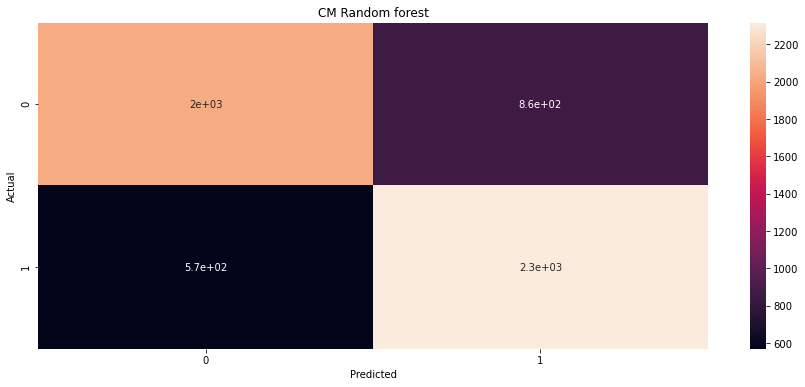

In [88]:
confm = confusion_matrix(target_test, predict)
print(confm)
plt.figure(figsize=(15,6))
sns.heatmap(confm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CM Random forest')
plt.show()

In [126]:
precision = confm[1][1]/(confm[1][1]+confm[0][1])
precision

0.7293043751967264

AUC = 0.7524


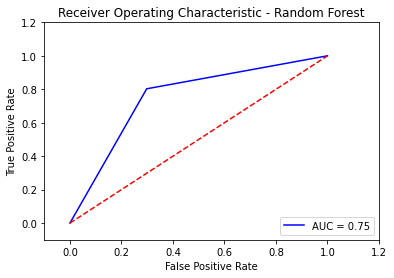

In [89]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC = %0.4f'% roc_auc)
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
precision_recall_fscore_support(target_test, predict, average='macro')

(0.7550182762303478, 0.7524255024255024, 0.7517946256877138, None)

In [91]:
forest.predict([[3,217,6,33.21659, -97.13162 ,217 ,14,1,1,12]])
#Bombing-  US -  Explosive Denton_Latitude Denton_longitude  US Private_citizen North America Yes December
# Will a bombing in Denton US in December month targeted at a Private Citizen Will be Successful or Not
# Will Not be successful

array([0], dtype=int64)